# Analysis of R workshop minute-card feedback
<a href="Python.md">Switch to the Python feedback</a>

In [1]:
%matplotlib inline


"""Process the feedback using the spaCy natural language processing library
suggested by Jonathan Kin Wei Leung.

"""
# Builtin modules
import pathlib
# 3rd party
import spacy
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


model = "en_core_web_sm"
try:
    nlp = spacy.load(model)
except OSError:
    raise IOError(("Error: You're missing the spacy model. Install it with:\n"
                   "    python3 -m spacy download --user " + model))

# For some reason my IPython interpreter keeps starting in the main git
# directory, so search recursively to find an exact file match.
path = next(pathlib.Path().rglob("r_feedback.csv"))

df = pd.read_csv(path).fillna('')
df = df[df.exclude != 'x']
df['doc'] = df['feedback'].apply(lambda x: nlp(x))
df.head()

,datetime,day,color,exclude,feedback,doc
0,2019-06-13 AM,day1_AM,green,,The online portal for documentation is straigh...,"(The, online, portal, for, documentation, is, ..."
1,2019-06-13 AM,day1_AM,green,,Good examples. Helpful resources and tools at...,"(Good, examples, ., , Helpful, resources, and..."
2,2019-06-13 AM,day1_AM,green,,Good overview and examples of Unix shell comma...,"(Good, overview, and, examples, of, Unix, shel..."
3,2019-06-13 AM,day1_AM,green,,Exposure to a variety of resources for help wi...,"(Exposure, to, a, variety, of, resources, for,..."
4,2019-06-13 AM,day1_AM,green,,It's easy to follow; I learned some useful syn...,"(It, 's, easy, to, follow, ;, I, learned, some..."


In [2]:
day1 = df[df.day.str.contains('day1')]
day1_green = day1[day1.color == 'green']
day1_red = day1[day1.color == 'red']
print ("Day1 green feedback", day1_green.shape[0])
print ("Day1 red feedback", day1_red.shape[0])

Day1 green feedback 35
Day1 red feedback 36


In [3]:
day2 = df[df.day.str.contains('day2')]
day2_green = day2[day2.color == 'green']
day2_red = day2[day2.color == 'red']
print ("Day2 green feedback", day2_green.shape[0])
print ("Day2 red feedback", day2_red.shape[0])

Day2 green feedback 28
Day2 red feedback 20


In [4]:
nouns = {}
verbs = {}


for i, r in df.iterrows():
    color = r.color
    day = r.day
    feedback = r.feedback
    doc = r.doc
    for d in (nouns,verbs):
        if d.get(day) is None:
            d[day] = {}
        if d[day].get(color) is None:
            d[day][color] = []
            
    for token in doc:
        #text = token.lemma_.lower()
        text = token.text.lower()
        wtype = token.pos_
        if wtype == 'NOUN' or wtype == 'ADJ':
            nouns[day][color].append(text)
        elif wtype == 'VERB':
            verbs[day][color].append(text)

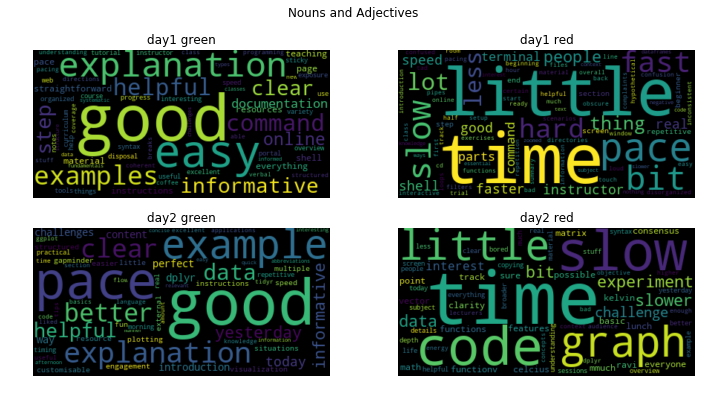

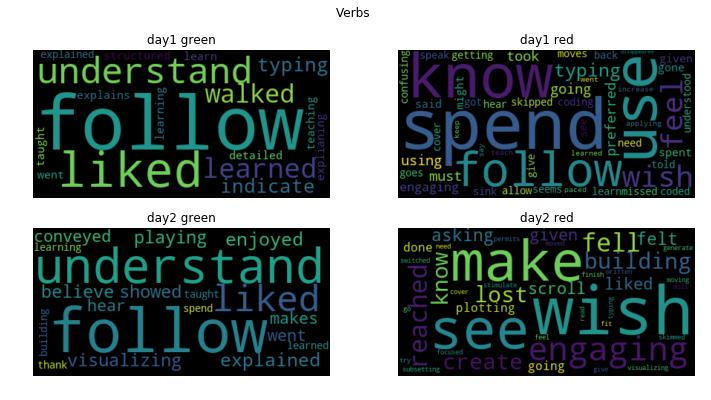

In [5]:
parts = ['Nouns and Adjectives','Verbs']  
for part in (nouns, verbs):
    wtype = parts.pop(0)
    
    f = 1
    
    for day in ('day1','day2'):
        if f == 1:
            plt.suptitle(wtype)
        for color in ('green','red'):
            sp = '22'+str(f)
            plt.subplot(sp)
            plt.title(day+' '+color)

            #print(sp,day,color,wtype)
            words = part[day+'_AM'][color] + part[day+'_PM'][color]
            wc = WordCloud().generate(' '.join(words))
            plt.imshow(wc, interpolation='bilinear')
            plt.axis("off")
            
            if f == 4:
                label = 'nouns_and_adjectives' if 'Noun' in wtype else 'verbs'
                filename = 'r_images/'+label+ '.png'
                plt.gcf().set_size_inches(12, 6)
                plt.savefig(filename)
                plt.show()
                f = 1
            else:
                f += 1
            
                

